# Question Q10

*Question*: How were requirements typically documented in the ML-enabled system projects you participated in?

*Answer Type*: Multiple Option and Free Field

*Options*: [To the best of my knowledge requirements were not documented, Requirements vision document (e.g. RUP requirements vision document, MVP Canvas), Structured requirements lists, Goal models, Use case models, Prototypes, User stories, BDD scenarios, ML canvas, Documented code notebooks (e.g., Jupyter Notebooks with text cells), Data models (e.g, entity relationship models), Other please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
documents = {
    'Q10_ML_Documentation_Not_Documented': 'Not Documented',
    'Q10_ML_Documentation_Vision_Document': 'Vision Documents',
    'Q10_ML_Documentation_Requirements_Lists': 'Requirements Lists',
    'Q10_ML_Documentation_Goal_Models': 'Goal',
    'Q10_ML_Documentation_Use_Case_Models': 'Use Case',
    'Q10_ML_Documentation_Prototypes': 'Prototypes',
    'Q10_ML_Documentation_User_Stories': 'User Stories',
    'Q10_ML_Documentation_BDD_Scenarios': 'BDD Scenarios',
    'Q10_ML_Documentation_MLCanvas': 'ML Canvas',
    'Q10_ML_Documentation_Notebooks': 'Notebooks',
    'Q10_ML_Documentation_Data_Models': 'Data Models',
    'Q10_ML_Documentation_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q10_ML_Documentation_Not_Documented', 'Q10_ML_Documentation_Vision_Document', 
                  'Q10_ML_Documentation_Requirements_Lists', 'Q10_ML_Documentation_Goal_Models', 
                  'Q10_ML_Documentation_Use_Case_Models', 'Q10_ML_Documentation_Prototypes',
                  'Q10_ML_Documentation_User_Stories', 'Q10_ML_Documentation_BDD_Scenarios',
                  'Q10_ML_Documentation_MLCanvas', 'Q10_ML_Documentation_Notebooks',
                  'Q10_ML_Documentation_Data_Models', 'Q10_ML_Documentation_Others',
                  'Q10_ML_Documentation_Others_Free']].head()

,Q10_ML_Documentation_Not_Documented,Q10_ML_Documentation_Vision_Document,Q10_ML_Documentation_Requirements_Lists,Q10_ML_Documentation_Goal_Models,Q10_ML_Documentation_Use_Case_Models,Q10_ML_Documentation_Prototypes,Q10_ML_Documentation_User_Stories,Q10_ML_Documentation_BDD_Scenarios,Q10_ML_Documentation_MLCanvas,Q10_ML_Documentation_Notebooks,Q10_ML_Documentation_Data_Models,Q10_ML_Documentation_Others,Q10_ML_Documentation_Others_Free
0,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
2,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
3,not quoted,quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
4,not quoted,not quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99


In [6]:
indexes = []
values = []
chart_positions = []
for document in documents:
    indexes.append(documents[document])
    values.append(dataframe_obj.df[document].value_counts()['quoted'])
    chart_positions.append(1 if '_Others' not in document else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['Q10_ML_Documentation_Not_Documented'] == 'quoted' or row['Q10_ML_Documentation_Vision_Document'] == 'quoted' or row['Q10_ML_Documentation_Requirements_Lists'] == 'quoted' or row['Q10_ML_Documentation_Goal_Models'] == 'quoted' or row['Q10_ML_Documentation_Use_Case_Models'] == 'quoted' or row['Q10_ML_Documentation_Prototypes'] == 'quoted' or row['Q10_ML_Documentation_User_Stories'] == 'quoted' or row['Q10_ML_Documentation_BDD_Scenarios'] == 'quoted' or row['Q10_ML_Documentation_MLCanvas'] == 'quoted' or row['Q10_ML_Documentation_Notebooks'] == 'quoted' or row['Q10_ML_Documentation_Data_Models'] == 'quoted' or row['Q10_ML_Documentation_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
q10_plot = PlotUtils(pd.DataFrame(
    data={'Documentation': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


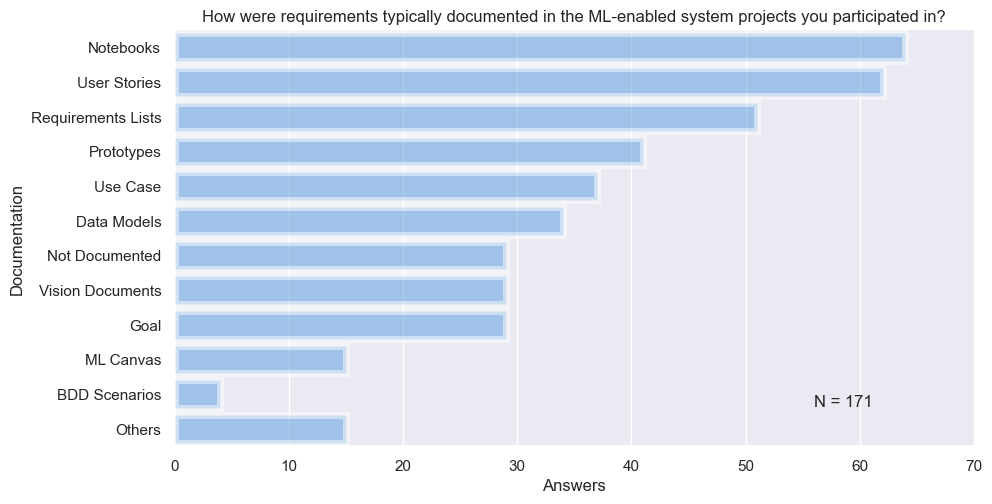

In [9]:
q10_plot.single_barplot(x_axis="Answers", y_axis="Documentation",
                       title="How were requirements typically documented in the ML-enabled system projects you participated in?",
                       x_label="Answers", y_label="Documentation", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
documents_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q10_ML_Documentation_Others_Free'])))
documents_free = list(filter(lambda a: str(a) != '-66', documents_free))
documents_free = list(filter(lambda a: str(a) != 'nan', documents_free))

In [11]:
documents_words = format_wordcloud_text(texts=documents_free, use_sep=False)

In [12]:
# plot object
q10_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(documents_words.keys()), 'Weight': list(documents_words.values())}
))

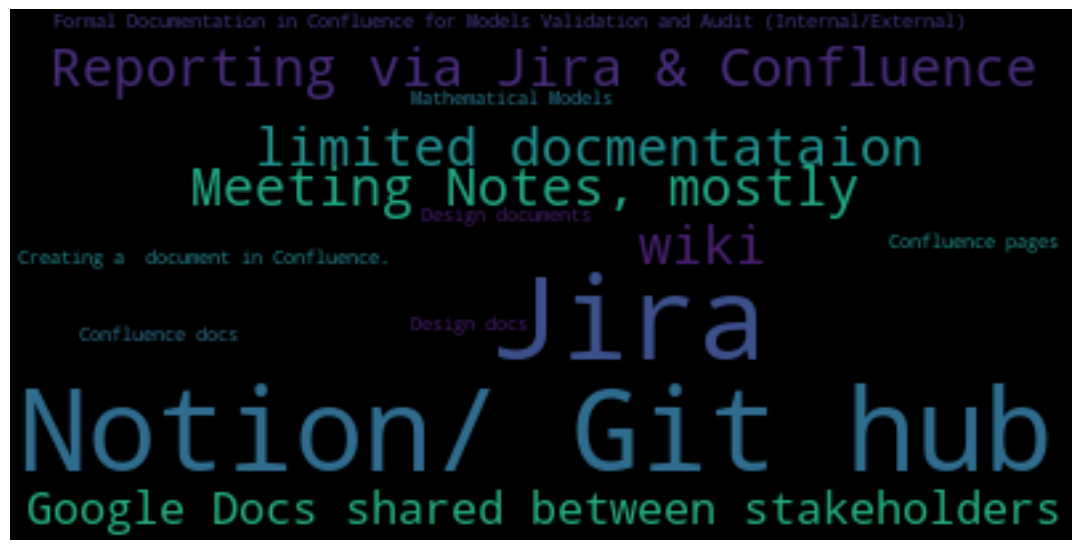

In [13]:
q10_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [14]:
prefix = "Q10_ML_Documentation_"

In [15]:
# the possible answers are the ones in columns
valid_options_list = [document_column.split(prefix)[1] for document_column in documents]

In [16]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'Others' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [17]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [18]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [19]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [documents[prefix + idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [20]:
values = [100 * v for v in values]

In [21]:
# plot object for bootstrapped data
q10_boot_plot = PlotUtils(pd.DataFrame(
    data={'Documents': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


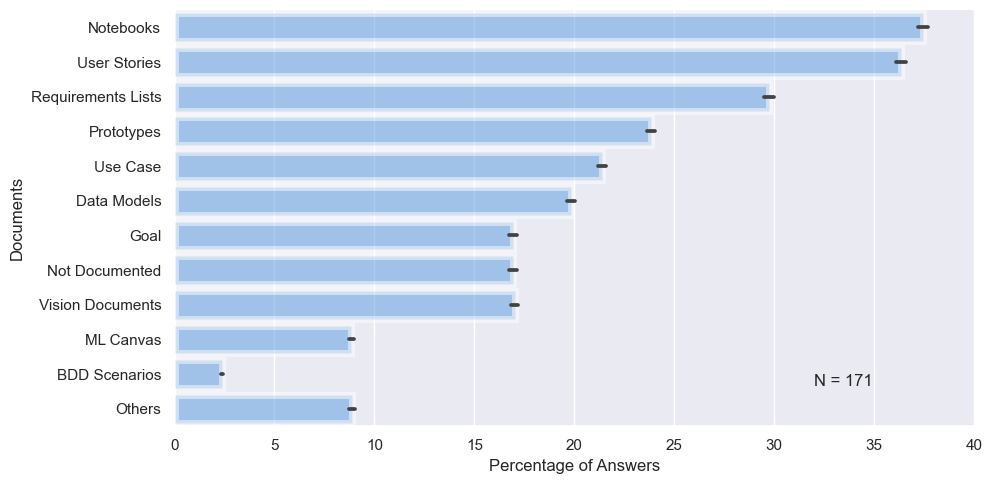

In [22]:
q10_boot_plot.single_barplot(x_axis="Value", y_axis="Documents", 
                       # title="Bootstrapping - 95% Confidence \n How were requirements typically documented in the ML-enabled system projects you participated in?",
                       title="",
                             x_label="Percentage of Answers", y_label="Documents", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [23]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
tuples = []
for idx in bootstrapped_dict_data:
    tuples.append((idx, bootstrapped_dict_data[idx]['confidence'][1]))
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Not_Documented:(0.16752535920168682, 0.16937426900584793, 0.17122317881000904)
Vision_Document:(0.16852523855599802, 0.17033333333333334, 0.17214142811066865)
Requirements_Lists:(0.2947845120288768, 0.29727485380116964, 0.2997651955734625)
Goal_Models:(0.16735360358347695, 0.16922807017543856, 0.17110253676740017)
Use_Case_Models:(0.21201724841622666, 0.2140292397660819, 0.21604123111593715)
Prototypes:(0.23648326752836293, 0.23850292397660822, 0.2405225804248535)
User_Stories:(0.36113061019985326, 0.3634385964912281, 0.36574658278260297)
BDD_Scenarios:(0.023006391186971474, 0.023672514619883043, 0.02433863805279461)
MLCanvas:(0.08712710317593222, 0.08852046783625729, 0.08991383249658236)
Notebooks:(0.3722390903489811, 0.3745672514619882, 0.3768954125749953)
Data_Models:(0.19612266078241006, 0.1981578947368421, 0.20019312869127412)
Others:(0.08723998560965475, 0.08869590643274852, 0.0901518272558423)


In [24]:
from operator import itemgetter
tuples_sorted = sorted(tuples, key=itemgetter(1))

for ts in tuples_sorted[::-1]:
    print(ts[0] + ',' + str(round((ts[1] * 100), 2)))

Notebooks,37.46
User_Stories,36.34
Requirements_Lists,29.73
Prototypes,23.85
Use_Case_Models,21.4
Data_Models,19.82
Vision_Document,17.03
Not_Documented,16.94
Goal_Models,16.92
Others,8.87
MLCanvas,8.85
BDD_Scenarios,2.37


In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Not_Documented:: P = 16.937 [16.753, 17.122]
Vision_Document:: P = 17.033 [16.853, 17.214]
Requirements_Lists:: P = 29.727 [29.478, 29.977]
Goal_Models:: P = 16.923 [16.735, 17.11]
Use_Case_Models:: P = 21.403 [21.202, 21.604]
Prototypes:: P = 23.85 [23.648, 24.052]
User_Stories:: P = 36.344 [36.113, 36.575]
BDD_Scenarios:: P = 2.367 [2.301, 2.434]
MLCanvas:: P = 8.852 [8.713, 8.991]
Notebooks:: P = 37.457 [37.224, 37.69]
Data_Models:: P = 19.816 [19.612, 20.019]
Others:: P = 8.87 [8.724, 9.015]
